In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [1]:
! pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
#Importing main packages and path to the data set in  my Google drive

import pandas as pd
import pandas_profiling as pf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
path_train='/content/drive/MyDrive/Master/Machine Learning/Assignment1/Regression Bit_rate/bitrate_train.csv'
path_test='/content/drive/MyDrive/Master/Machine Learning/Assignment1/Regression Bit_rate/bitrate_test.csv'

train_df=pd.read_csv(path_train, low_memory=False)
test_df=pd.read_csv(path_test, low_memory=False)

#Splitting data into training, testing


x_train=train_df.drop(['target'],axis=1)
y_train=train_df['target']

x_test=test_df.drop(['target'],axis=1)
y_test=test_df['target']

#pf.ProfileReport(x_train)


In [49]:
###Preprocessing:

##1-Feature Selection:

#According to Pandas profiling. we have two features that corrleate heavily with third one, so we drop them : dropped_frames_std, dropped_frames_max

x_train_f = x_train.drop(['dropped_frames_max','dropped_frames_std'],axis=1)
x_test_f = x_test.drop(['dropped_frames_max','dropped_frames_std'],axis=1)



In [50]:


# imputing missing values
"""Panda Profiling report shows no missing data / NANs. Hence, no Imputing is required"""


##Scaling the train and test data Using MinMax#

scaler = MinMaxScaler()
scaler.fit(x_train_f)
x_train_f_s = pd.DataFrame(scaler.transform(x_train_f), columns=x_train_f.columns)
x_test_f_s = pd.DataFrame(scaler.transform(x_test_f), columns=x_test_f.columns)


#Splitting train data into two parts : training and validating
from sklearn.model_selection import train_test_split

x_train_val, x_test_val, y_train_val, y_val = train_test_split(x_train_f_s, y_train, test_size=0.2, random_state=123)



In [51]:
#Method 1 : Linear Regression for one predictor, I choosed the fps_mean as it has less zero values and less skewed than RTT according to pandas profiling
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##assigning train set and test to one feature
x_train_one_predictor = x_train_f_s['fps_mean']
x_test_one_predictor = x_test_f_s['fps_mean']


regressor = LinearRegression()
clf=regressor.fit(x_train_one_predictor[:,np.newaxis], y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

#print(scores)
y_pred_one_predictor = regressor.predict(x_test_one_predictor[:,np.newaxis])




Model intercept : 4723.253086890296
Model coefficients : [12860.62961311]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()


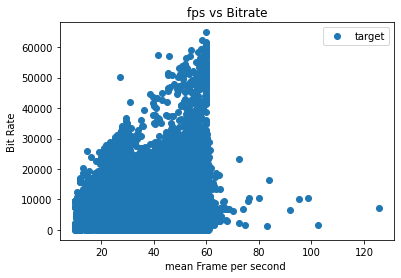

In [45]:
train_df.plot(x='fps_mean', y='target', style='o')
plt.title('fps vs Bitrate')
plt.xlabel('mean Frame per second ')
plt.ylabel('Bit Rate')
plt.show()

##we see that the maximum value for sufficient bitrate is at 60fps, any further value the bitrate drops

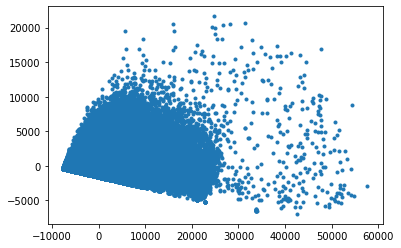

In [46]:
#Applying PCA
from sklearn.decomposition import PCA

dim_reducer = PCA(n_components=2)
x_train_reduced = dim_reducer.fit_transform(x_train)

# Write code to plot the reduced dataset in a scatter plot.
plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], marker='.')
plt.show()

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_one_predictor))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_one_predictor))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_one_predictor)))
print('R2:', metrics.r2_score(y_test, y_pred_one_predictor))
eval1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_one_predictor})
display(eval1)


Mean Absolute Error: 4553.654342752259
Mean Squared Error: 34349848.81734121
Root Mean Squared Error: 5860.874407231502
R2: 0.03675829642982331


,Actual,Predicted
0,718.0,6933.326742
1,670.9,6944.432640
2,789.8,6944.432640
3,723.2,6933.326742
4,693.6,6944.432640
...,...,...
228140,5337.0,6278.078774
228141,5337.0,6278.078774
228142,5337.0,6278.078774
228143,5337.0,6278.078774


In [41]:

#Method 2 : Linear Regression for multi predictors and feautre selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(x_train_f_s, y_train)

scores = cross_val_score(regressor,x_train_f_s, y_train,cv=3, scoring="r2")
y_pred = regressor.predict(x_test_f_s)
display(scores)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")





array([0.89077469, 0.90650882, 0.87724007])

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
eval2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(eval2)



Mean Absolute Error: 1076.8491685047309
Mean Squared Error: 3798632.101748698
Root Mean Squared Error: 1949.0079788827695
R2: 0.8934783999667106


,Actual,Predicted
0,718.0,998.471303
1,670.9,1031.630150
2,789.8,985.382326
3,723.2,1120.458517
4,693.6,1036.300787
...,...,...
228140,5337.0,5315.576976
228141,5337.0,5315.576976
228142,5337.0,5315.576976
228143,5337.0,5315.576976


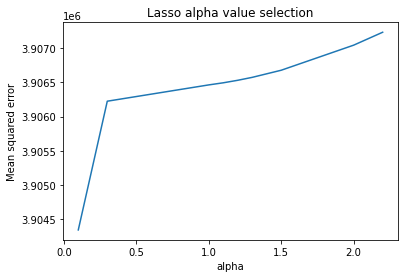

Best value of alpha: 0.1


In [20]:
##Method 3: Polynomial Regression with Lasso Regualarization

##searching for optimal alpha:

from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train_val, y_train_val)
    y_pred = lasso.predict(x_test_val)
    mse = mean_squared_error(y_val, y_pred)
    losses.append(mse)



In [ ]:
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

In [27]:

#Now polynomial Regression with Regularization


lasso_regression = Lasso(alpha=0.1)

polynomial_features = PolynomialFeatures(degree=4)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("lasso_regression", lasso_regression)])
pipeline.fit(x_train_f_s, y_train)
y_pred_regularized = pipeline.predict(x_test_f_s)


print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")


Model intercept : 360.4140366258471
Model coefficients : [  185.81588972   422.7572628  -7162.2974985   3783.17138352
 -1353.53078329 60056.79431897  3267.87629476]


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_regularized))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_regularized))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_regularized)))
print('R2:', metrics.r2_score(y_test, y_pred_regularized))
eval3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_regularized})
display(eval3)

MSE on testset: 3776605.710180983
Mean Absolute Error: 1054.7931652451334
Mean Squared Error: 3776605.710180983
Root Mean Squared Error: 1943.349096323402
R2: 0.8940960661186059


,Actual,Predicted
0,718.0,871.463791
1,670.9,906.595016
2,789.8,858.108453
3,723.2,1008.229788
4,693.6,911.143433
...,...,...
228140,5337.0,5317.683459
228141,5337.0,5317.683459
228142,5337.0,5317.683459
228143,5337.0,5317.683459


In [ ]:
data = np.stack([x_train_f_s,y], axis = 1)
